In [4]:
# http://pymc-devs.github.io/pymc3/notebooks/getting_started.html

import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

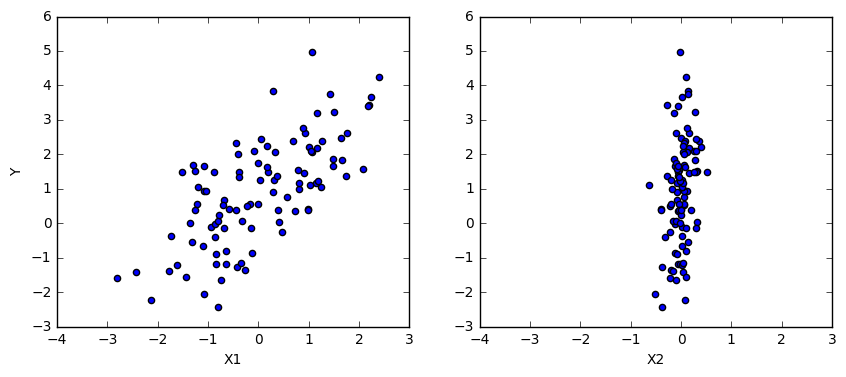

In [7]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [8]:
from pymc3 import Model, Normal, HalfNormal
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [9]:
help(Normal)

Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Univariate normal log-likelihood.
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  ========  ==========================================
 |  Support   :math:`x \in \mathbb{R}`
 |  Mean      :math:`\mu`
 |  Variance  :math:`\dfrac{1}{\tau}` or :math:`\sigma^2`
 |  ========  ==========================================
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  Parameters
 |  ----------
 |  mu : float
 |      Mean.
 |  sd : float
 |      Standard deviation (sd > 0).
 |  tau : float
 |      Precision (tau > 0).
 |  
 |  Method resolution order:
 |      Normal
 |      pymc3.distr

In [10]:
mu = alpha + beta[0]*X1 + beta[1]*X2

In [11]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
{'beta': array([ 0.94848602,  2.60705514]), 'sigma_log_': array(-0.032781470174030665), 'alpha': array(0.9065985497559482)}


In [13]:
from scipy import optimize

map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.019762
         Iterations: 4
         Function evaluations: 176
{'beta': array([ 0.95140146,  2.61437458]), 'sigma_log_': array(-0.03000977520318259), 'alpha': array(0.9090521898978398)}


In [14]:
from pymc3 import NUTS, sample
from scipy import optimize

with basic_model:
    # draw 2000 posterior samples
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -153.48: 100%|██████████| 200000/200000 [00:14<00:00, 14047.61it/s]
Finished [100%]: Average ELBO = -153.51
100%|██████████| 2000/2000 [00:02<00:00, 747.48it/s] 


In [15]:
trace['alpha'][-5:]

array([ 0.94792056,  0.9203651 ,  0.89660456,  1.07492472,  0.78716292])

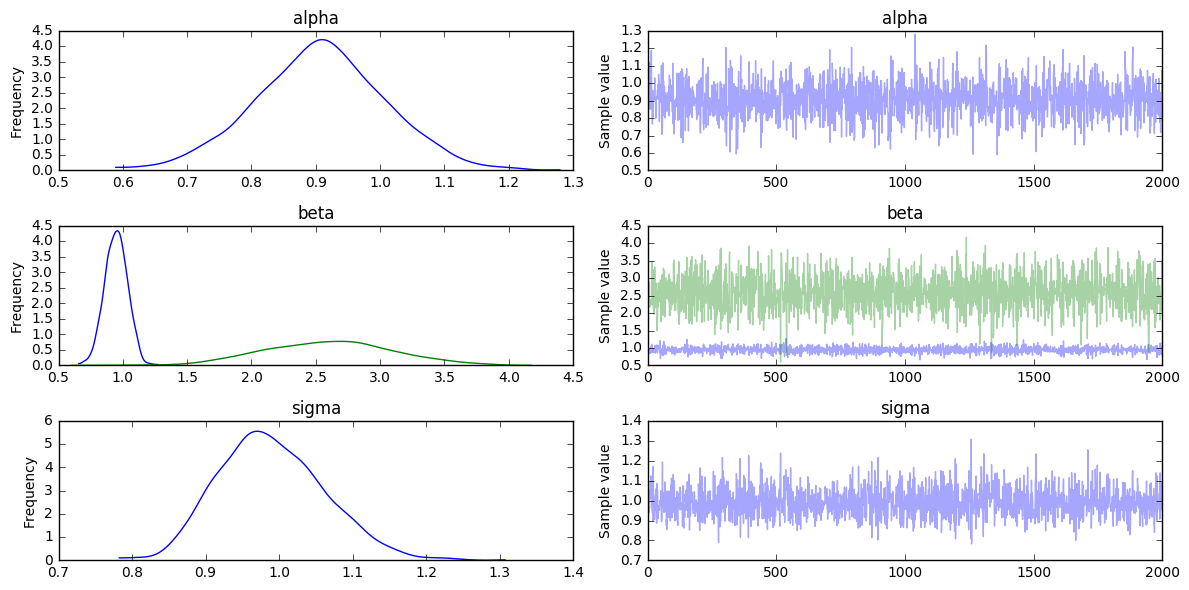

In [16]:
from pymc3 import traceplot

traceplot(trace);

In [17]:
from pymc3 import summary

summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.907            0.101            0.002            [0.710, 1.106]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.707          0.841          0.908          0.972          1.104


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.947            0.088            0.002            [0.775, 1.112]
  2.597            0.500            0.012            [1.659, 3.568]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.776          0.886          0.947          1.007          1.114
  1.660          2.246          2.604   